#LIMPIEZA DE DATOS, DATASET DE BANCO

La finalidad de esto es realizar una limpeza a un dataset de datos bancarios, con la finalidad de encontrar posibles tendencias que puede apoyar en la toma de desiciones que puedean llegar a presentar

Conectamos con drive

In [ ]:
#Conectamos con drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importamos librerias

In [ ]:
#Importamos libreria de pandas, numpy y mathplolib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Cargamos dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ejecicios de practica/Limpieza-Datos-Banco/dataset_banco.csv')

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45212,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


Validación del dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [ ]:
#Creamos copia del dataset original pARA MANIPULARLO
dfCopia = df.copy()

##Limpieza de datos
Aca podemos encotnrar varios contextos al momento de hacer limpieza de datos, contextos como:
- Datos faltantes
- Datos irrelevantes para el analisis
- Valores extremos "Outliers"
- Errores tipograficos

###Datos faltantes

In [ ]:
#Sumatoria de datos faltantes por columna
dfCopia.isna().sum()

,0
age,0
job,2
marital,1
education,1
default,0
balance,2
housing,0
loan,0
contact,0
day,0


In [ ]:
#Eliminamos los registros cuando tiene datos faltantes
dfCopia.dropna(inplace=True)

In [ ]:
dfCopia.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
dfCopia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


###Columnas Irrelevantes

Segun la finalidad del set de datos eliminaremos columnas irrelevantes que no afectan en el analisis o columnas donde todos los registros tienen el mismo valor, no es relevante porque no nos ayuda

In [ ]:
#Validamos cuantos valortes diferentes tienen las variables categoricas
colCategoricas = {'job','marital','education','default','housing','loan','contact','month','poutcome','y'}

#Recorremos cada valor  del arregglo
for col in colCategoricas:
  print(f'{col}: {dfCopia[col].nunique()}')

loan: 6
job: 18
marital: 6
poutcome: 6
month: 12
contact: 5
housing: 2
y: 2
default: 2
education: 10


Para las variables numericas podemos medir datos como medias, cuartiles, minimo, maximo y el conteo de datos

In [ ]:
#Validamos cuantos datos hay en la variable numerica
dfCopia.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


###Filas repetidas

In [ ]:
#Validamos si hay datos repetidos
dfCopia.duplicated().sum()

np.int64(4)

In [ ]:
#Eliminamos filas repetidas
dfCopia.drop_duplicates(inplace=True)

###Valores extremos "Outliers"

Los outliers no siempre es recomendable elminar, esto debido  a que  algunas veces contiene información importante, todo vaeia segun el contexto o analisis que estemos haciendo

Creamos una tabla boxplot de las variables numericas para ver si hay outliers

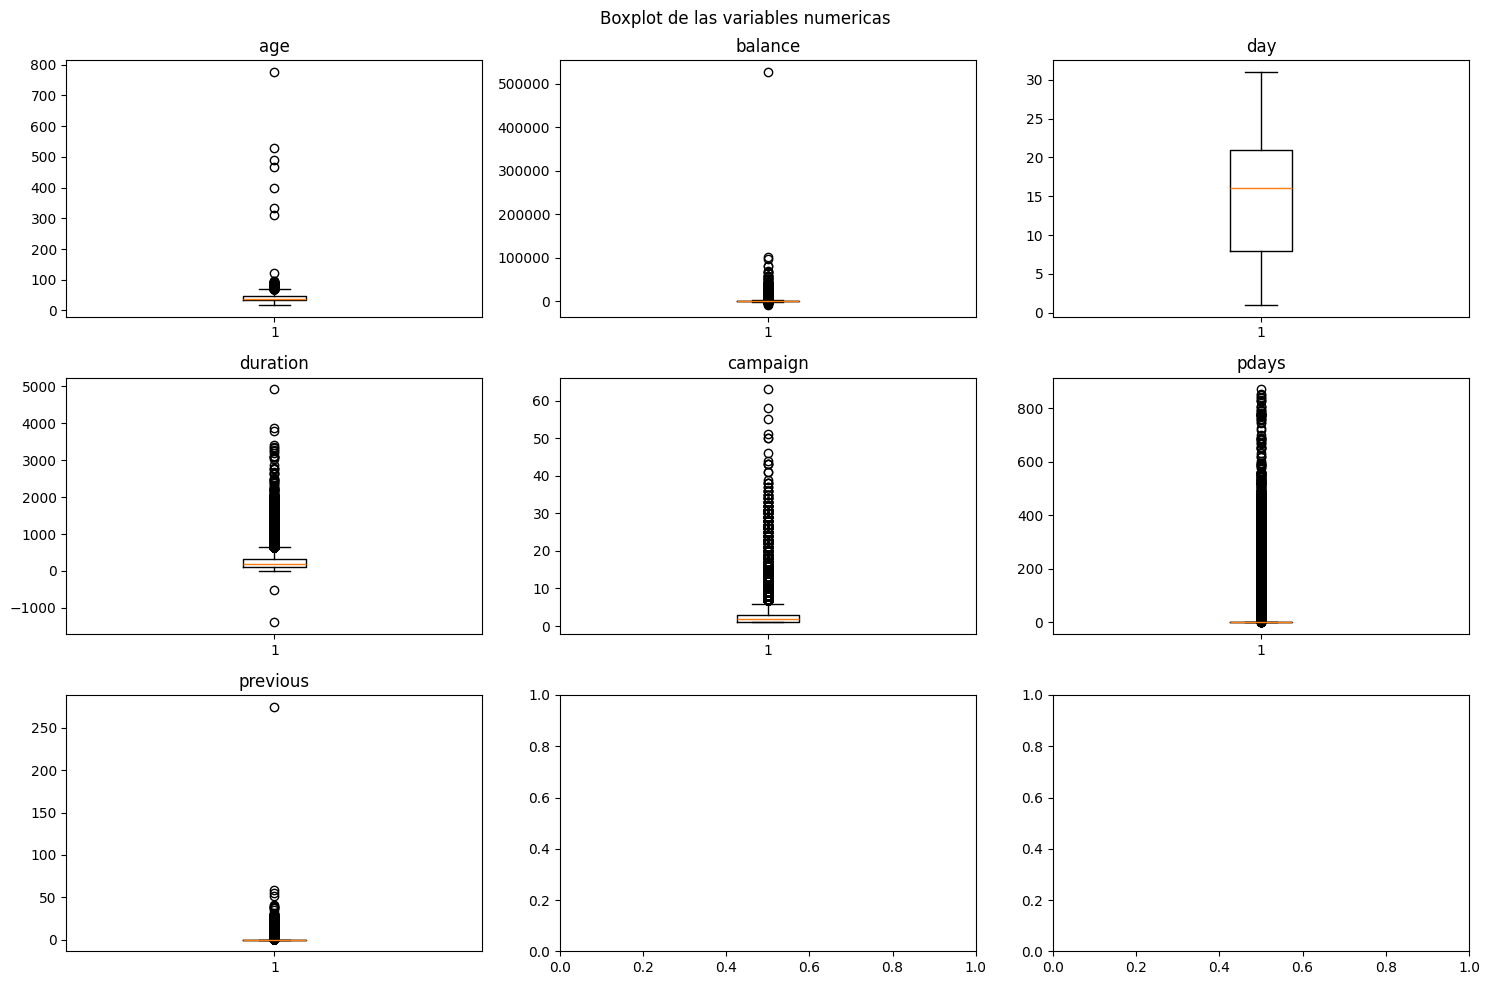

In [ ]:
#Creamos boxplot para la columna numerica

fig, axes = plt.subplots(nrows=3,ncols=3, figsize=(15, 10))#dimension del lienzo
fig.suptitle('Boxplot de las variables numericas')
#Titulos
axes[0,0].set_title('age')
axes[0,1].set_title('balance')
axes[0,2].set_title('day')
axes[1,0].set_title('duration')
axes[1,1].set_title('campaign')
axes[1,2].set_title('pdays')
axes[2,0].set_title('previous')
#Graficas
axes[0,0].boxplot(dfCopia['age'])
axes[0,1].boxplot(dfCopia['balance'])
axes[0,2].boxplot(dfCopia['day'])
axes[1,0].boxplot(dfCopia['duration'])
axes[1,1].boxplot(dfCopia['campaign'])
axes[1,2].boxplot(dfCopia['pdays'])
axes[2,0].boxplot(dfCopia['previous'])
plt.tight_layout()
plt.show()

Vamos a eliminar los registros donde la edad es mayor a 100 años

In [ ]:
#Nos quedamos con edades menores o iguales a 100
dfCopia = dfCopia[dfCopia['age'] <= 100]

Vamos a eliminar los registros donde la duracion es mayor a 0

In [ ]:
dfCopia = dfCopia[dfCopia['duration'] > 0]

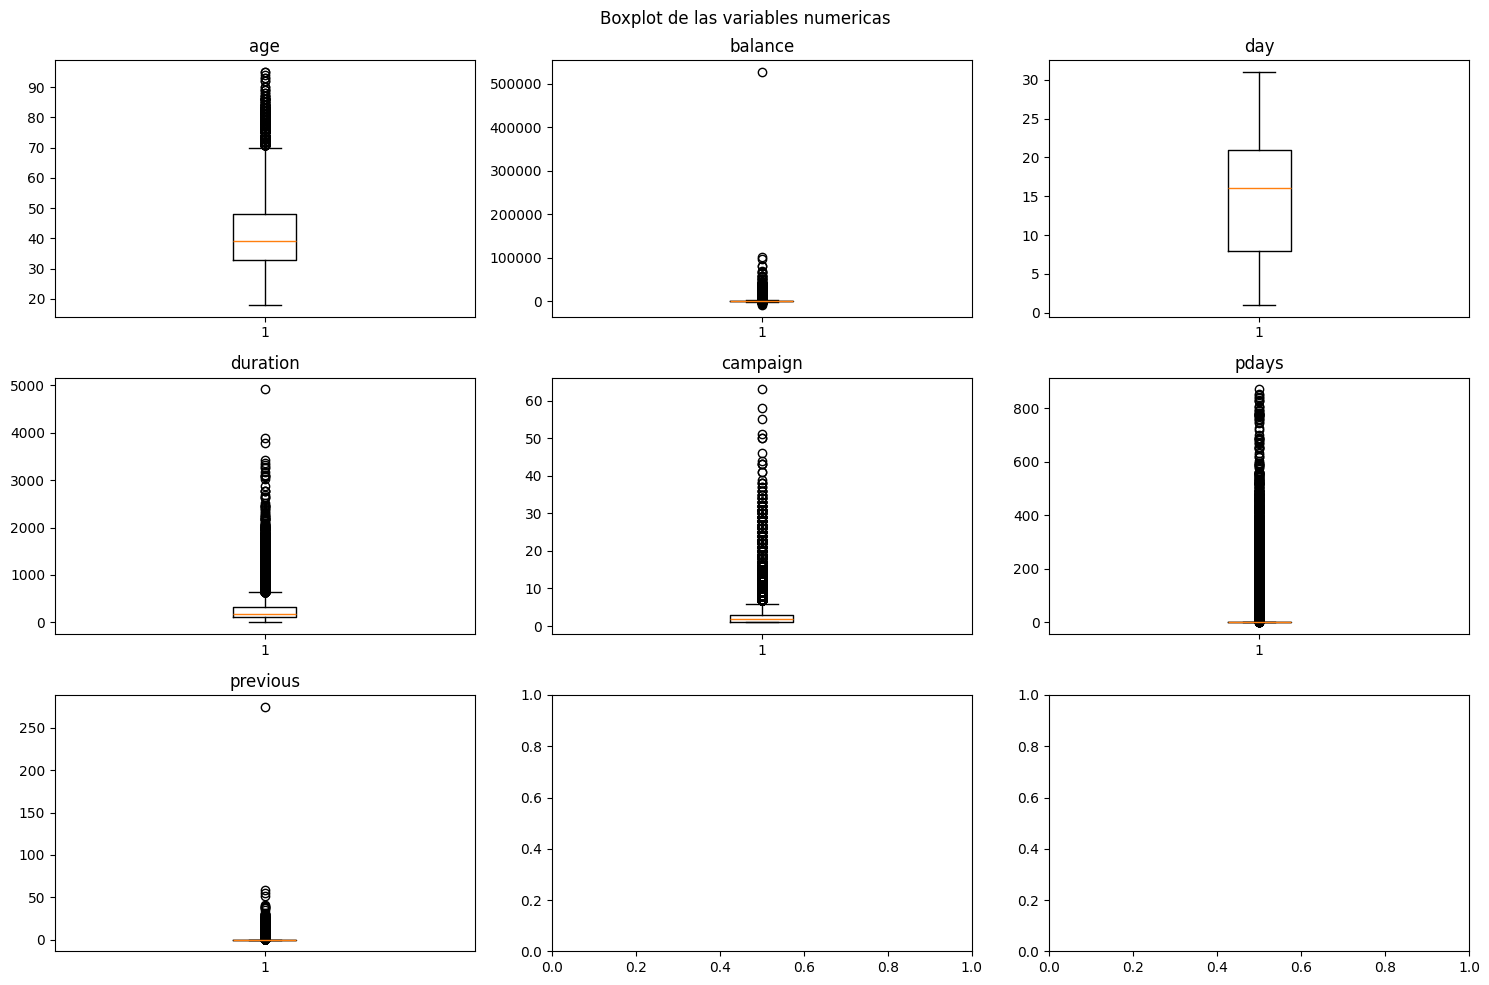

In [ ]:
#Creamos boxplot para la columna numerica

fig, axes = plt.subplots(nrows=3,ncols=3, figsize=(15, 10))#dimension del lienzo
fig.suptitle('Boxplot de las variables numericas')
#Titulos
axes[0,0].set_title('age')
axes[0,1].set_title('balance')
axes[0,2].set_title('day')
axes[1,0].set_title('duration')
axes[1,1].set_title('campaign')
axes[1,2].set_title('pdays')
axes[2,0].set_title('previous')
#Graficas
axes[0,0].boxplot(dfCopia['age'])
axes[0,1].boxplot(dfCopia['balance'])
axes[0,2].boxplot(dfCopia['day'])
axes[1,0].boxplot(dfCopia['duration'])
axes[1,1].boxplot(dfCopia['campaign'])
axes[1,2].boxplot(dfCopia['pdays'])
axes[2,0].boxplot(dfCopia['previous'])
plt.tight_layout()
plt.show()

###Errores tipograficos

Aca es posible que aparezcan errores al momento de digitalizar algun dato y sea la misma palabra pero escrita de varias formas

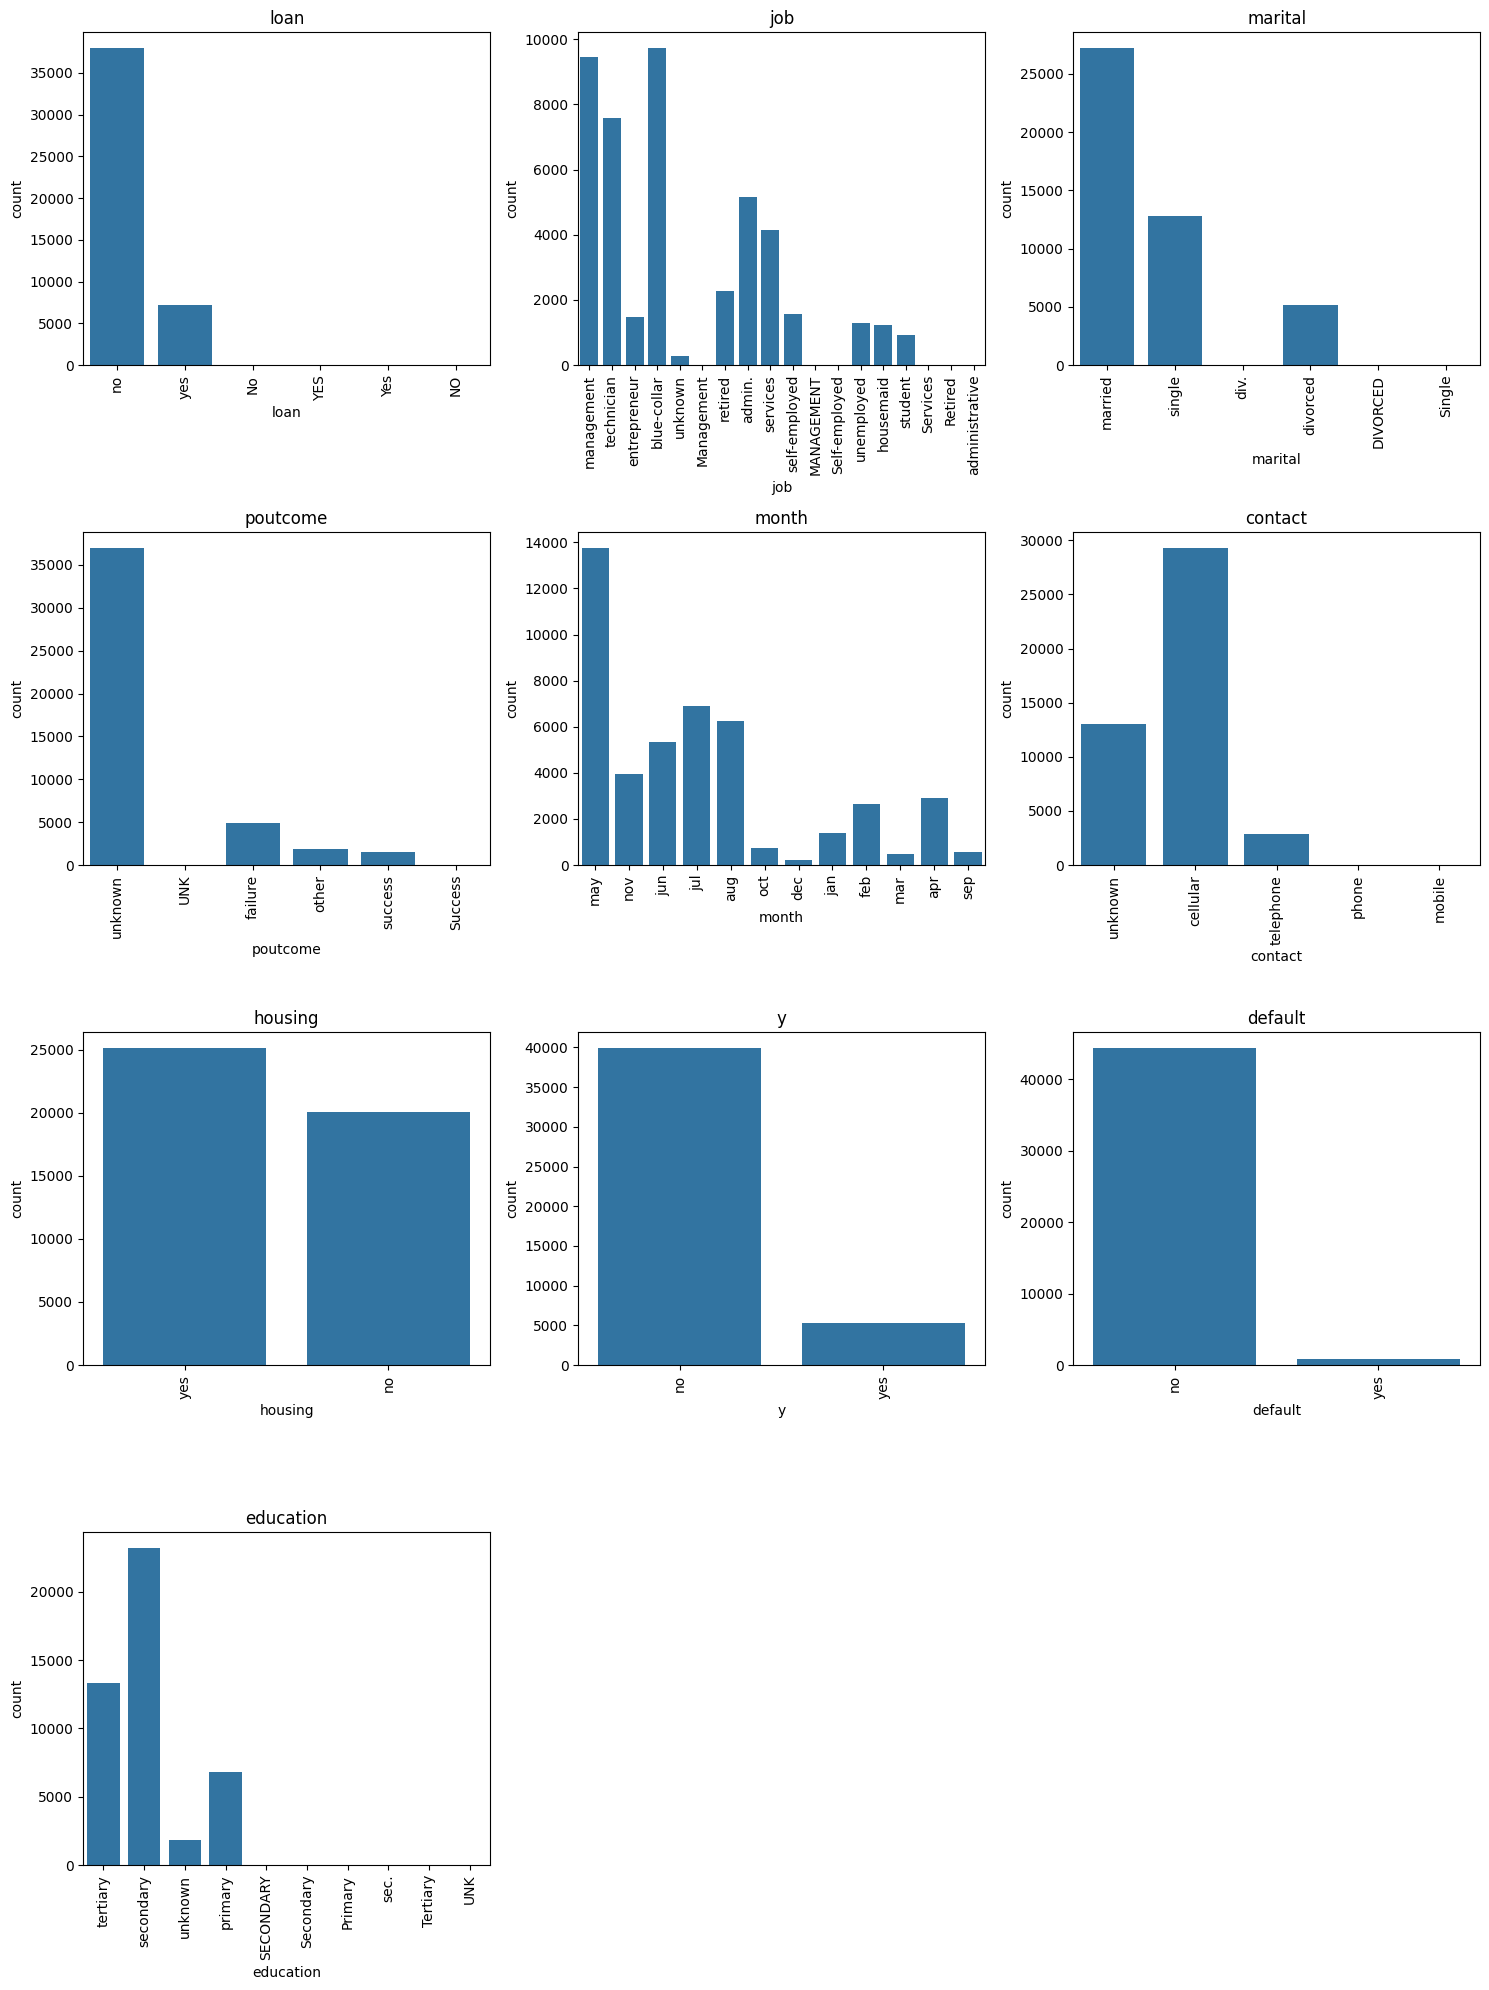

In [ ]:
colCategoricas = {'job','marital','education','default','housing','loan','contact','month','poutcome','y'}

# Calculate the number of rows and columns needed for the subplots
n_cols = 3  # You can adjust the number of columns as needed
n_rows = (len(colCategoricas) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array if there's more than one row
axes = axes.flatten()

for i, col in enumerate(colCategoricas):
  sns.countplot(x=dfCopia[col], ax=axes[i])
  axes[i].set_title(col)
  # Explicitly set the ticks before setting tick labels
  axes[i].set_xticks(axes[i].get_xticks())
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)


# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Ahora normalizaremos los datos para unidicarlos en una misma forma y establecer los datos iguales

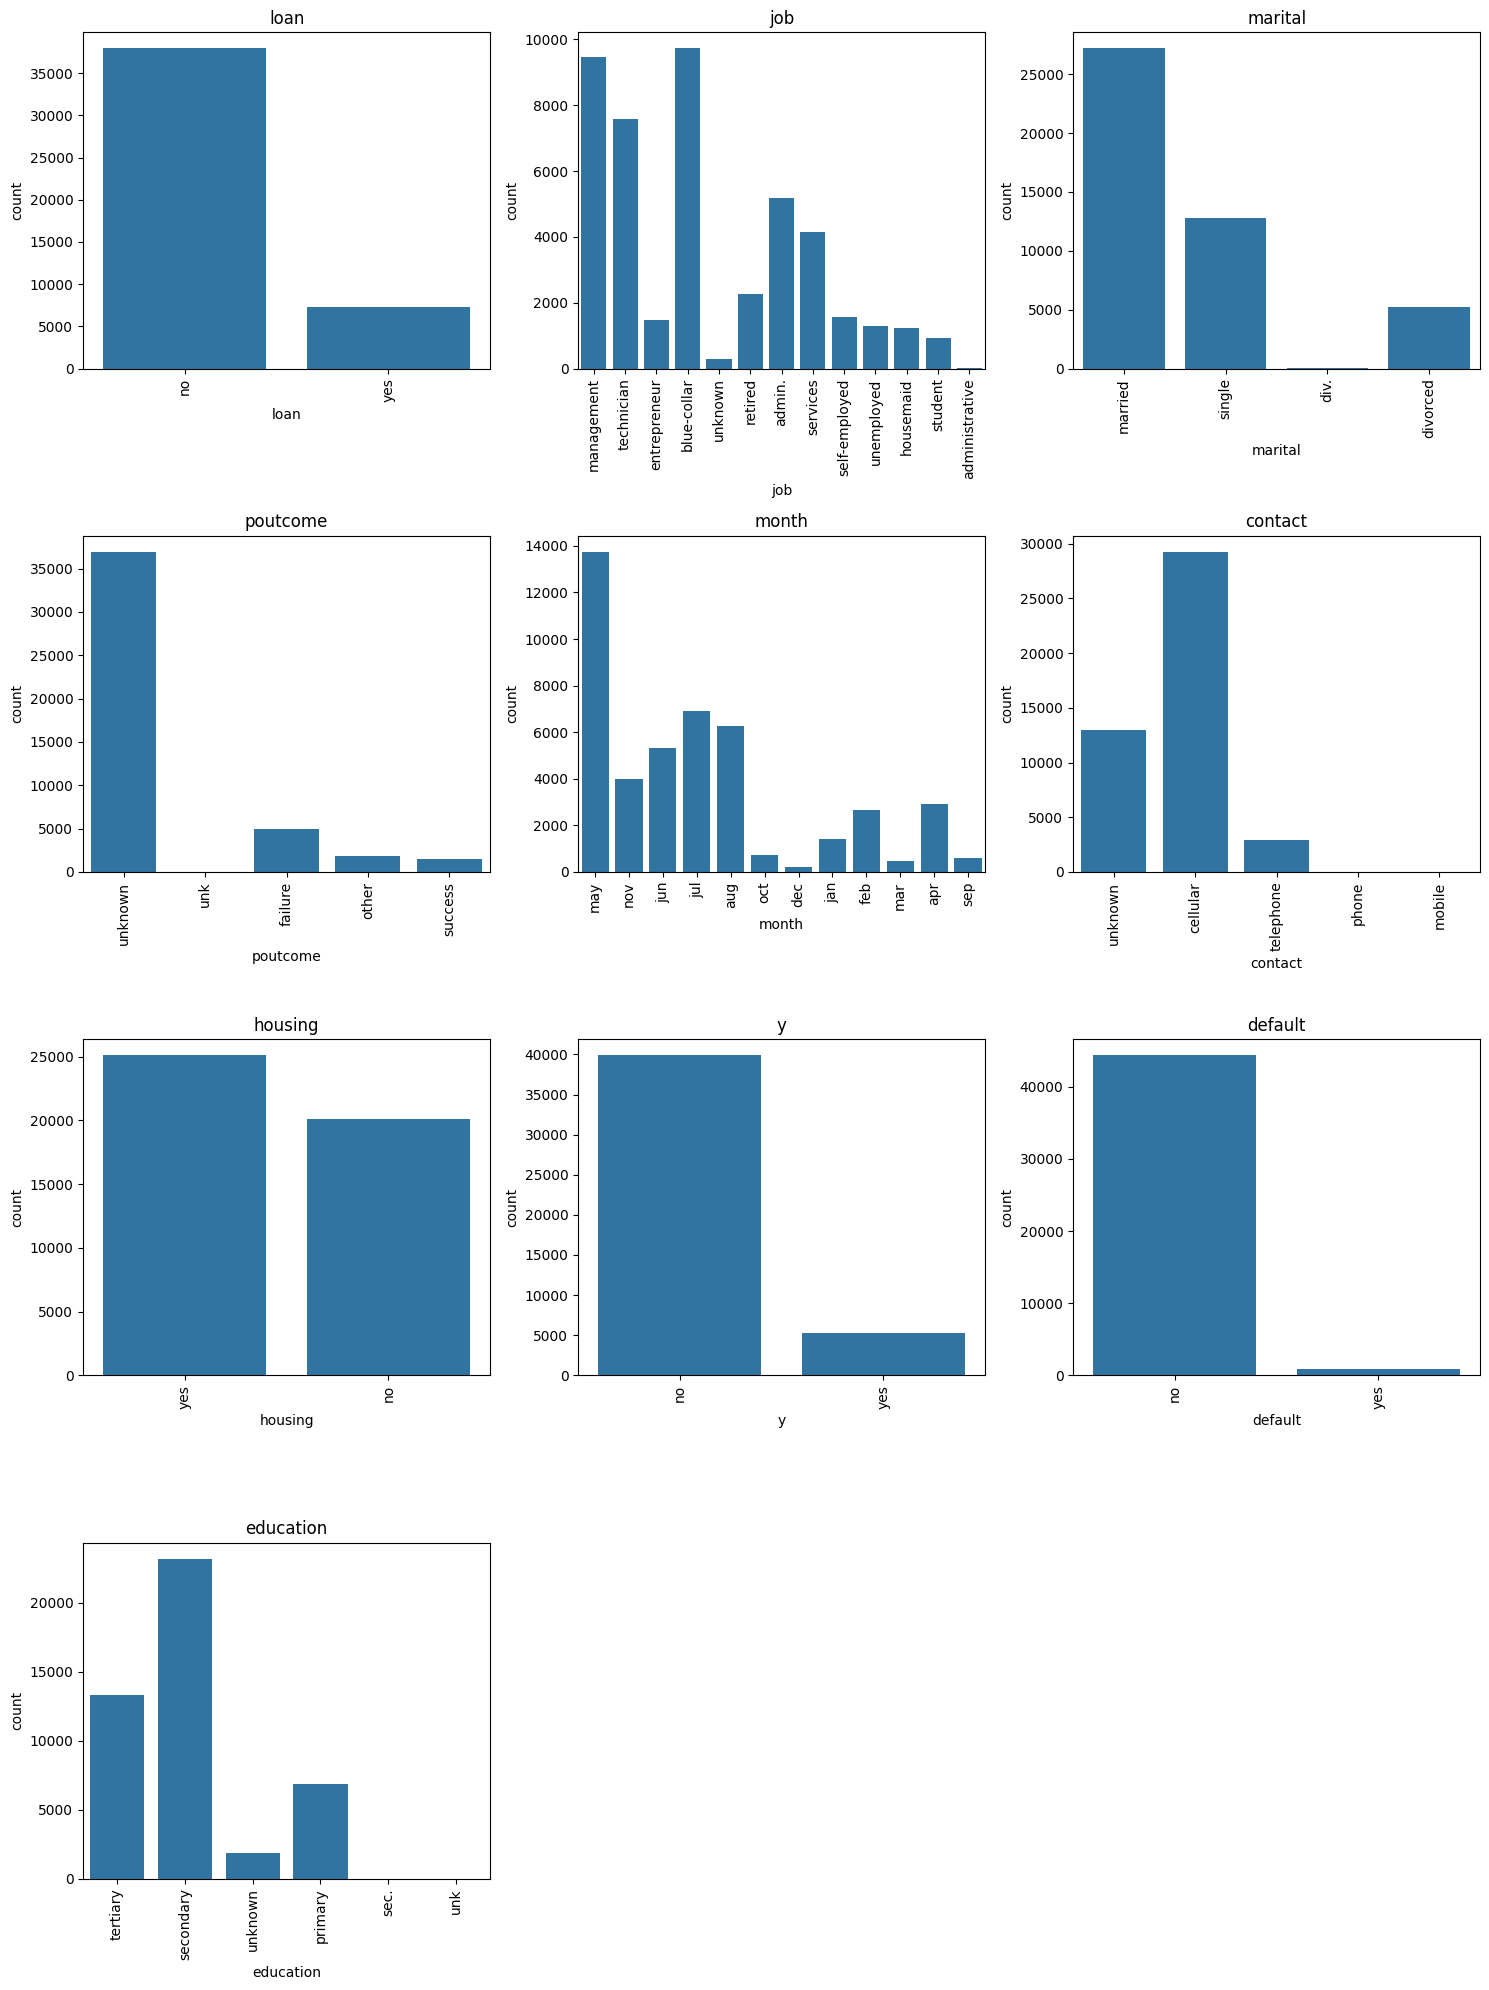

In [ ]:
for column in colCategoricas:
  if column in dfCopia.columns:
    dfCopia[column] = dfCopia[column].str.lower()

#graficamos esas variables
n_cols = 3  # You can adjust the number of columns as needed
n_rows = (len(colCategoricas) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array if there's more than one row
axes = axes.flatten()

for i, col in enumerate(colCategoricas):
  sns.countplot(x=dfCopia[col], ax=axes[i])
  axes[i].set_title(col)
  # Explicitly set the ticks before setting tick labels
  axes[i].set_xticks(axes[i].get_xticks())
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)


# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
#Unificamos admin y administrative
print(dfCopia['job'].unique())
dfCopia['job'] = dfCopia['job'].replace('admin.','administrative')

#Unificamos div. y divorced
print(dfCopia['marital'].unique())
dfCopia['marital'] = dfCopia['marital'].replace('divorced','divorced')

#Unificamos sec. y secondary, unk y unknown
print(dfCopia['education'].unique())
dfCopia['education'] = dfCopia['education'].replace('unknown','unknown')
print(dfCopia['education'].unique())
dfCopia['education'] = dfCopia['education'].replace('sec.','secondary')

#Unificamos tlephone y phone
print(dfCopia['contact'].unique())
dfCopia['contact'] = dfCopia['contact'].replace('phone','telephone')


['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']
['married' 'single' 'div.' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary' 'unk']
['tertiary' 'secondary' 'unknown' 'primary' 'unk']
['unknown' 'cellular' 'telephone' 'phone' 'mobile']
